In [12]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load dataset
df = pd.read_csv("/content/customer_churn_dataset-training-master.csv")

In [14]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [15]:
# Explore dataset
df.shape

(440833, 12)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [17]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [18]:
print('Unique values per each column')
for cols in df.columns:
  print(f'{cols} : {df[cols].nunique()}')

Unique values per each column
CustomerID : 440832
Age : 48
Gender : 2
Tenure : 60
Usage Frequency : 30
Support Calls : 11
Payment Delay : 31
Subscription Type : 3
Contract Length : 3
Total Spend : 68363
Last Interaction : 30
Churn : 2


In [19]:
df['Churn'].value_counts()

,count
Churn,
1.0,249999
0.0,190833


In [20]:
df.isna().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [21]:
df[df.isna().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.drop(199295, inplace = True)

In [23]:
df.isna().any()

,0
CustomerID,False
Age,False
Gender,False
Tenure,False
Usage Frequency,False
Support Calls,False
Payment Delay,False
Subscription Type,False
Contract Length,False
Total Spend,False


In [24]:
df.groupby(['Gender','Churn']).size().reset_index(name='Count')

,Gender,Churn,Count
0,Female,0.0,63522
1,Female,1.0,127058
2,Male,0.0,127311
3,Male,1.0,122941


In [25]:
df['Churn'].value_counts()

,count
Churn,
1.0,249999
0.0,190833


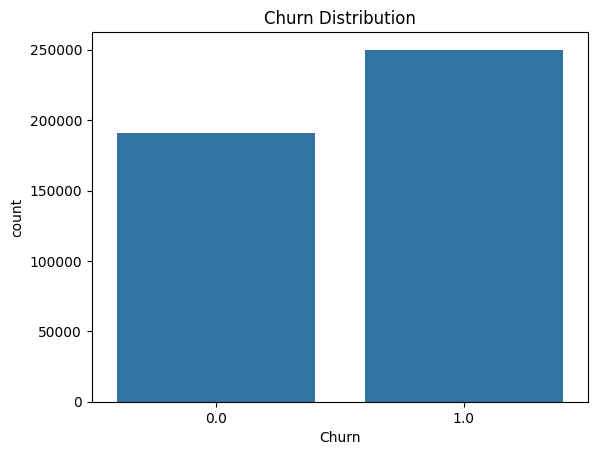

In [26]:
# Basic EDA - Plot target distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

In [27]:
numerical_columns = df.select_dtypes(include = ['int64','float64']).columns.to_list()
numerical_columns.remove('Churn')
numerical_columns

['CustomerID',
 'Age',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Total Spend',
 'Last Interaction']

In [28]:
categorical_columns = df.select_dtypes(include = 'object').columns.to_list()
categorical_columns

['Gender', 'Subscription Type', 'Contract Length']

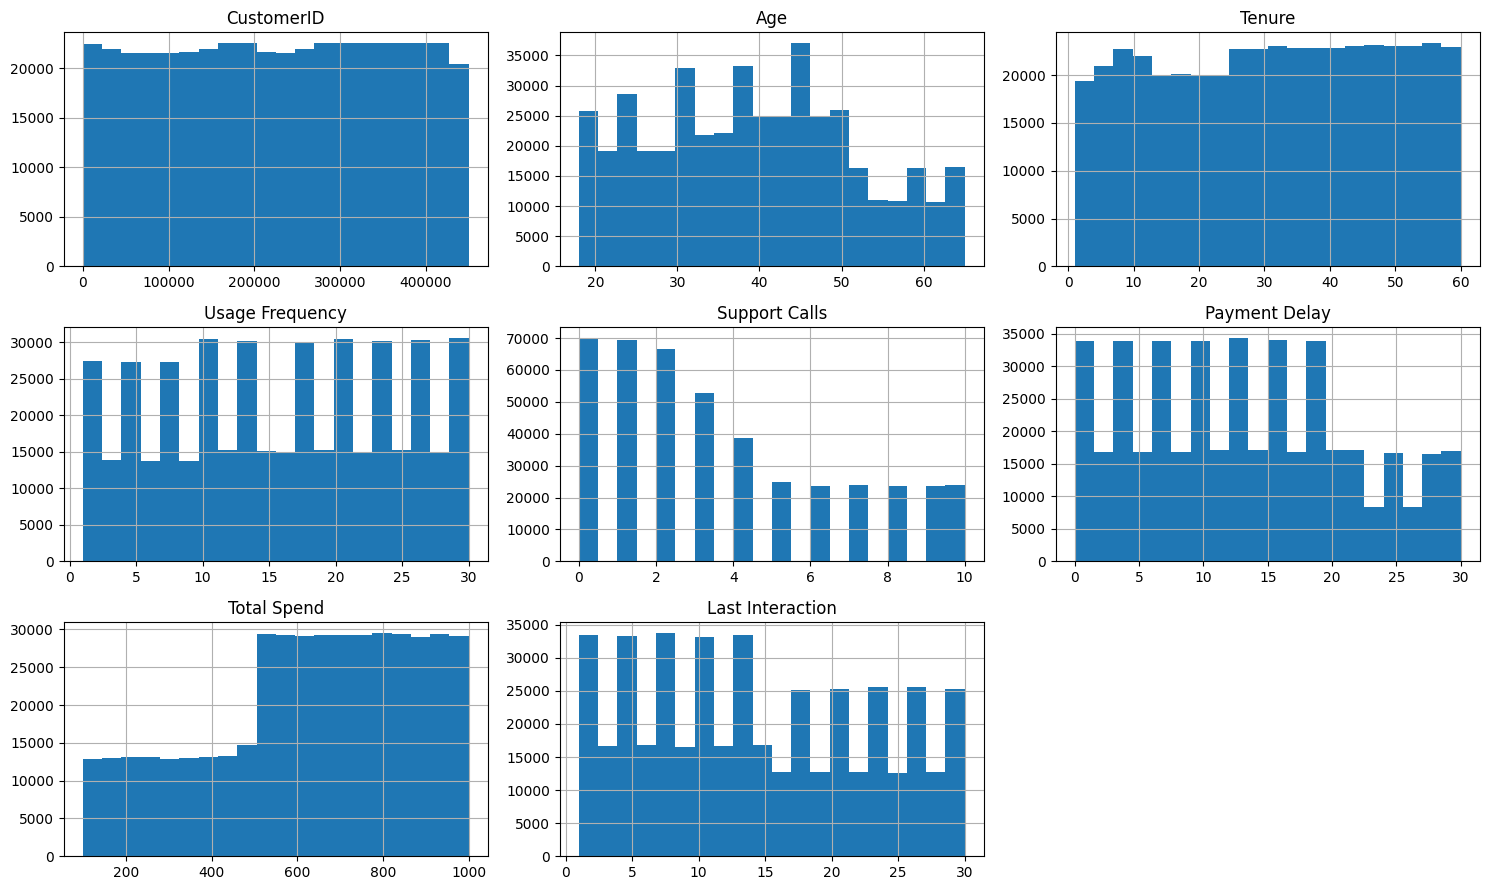

In [29]:
df[numerical_columns].hist(bins = 20, figsize = (15, 9))
plt.tight_layout()
plt.show()

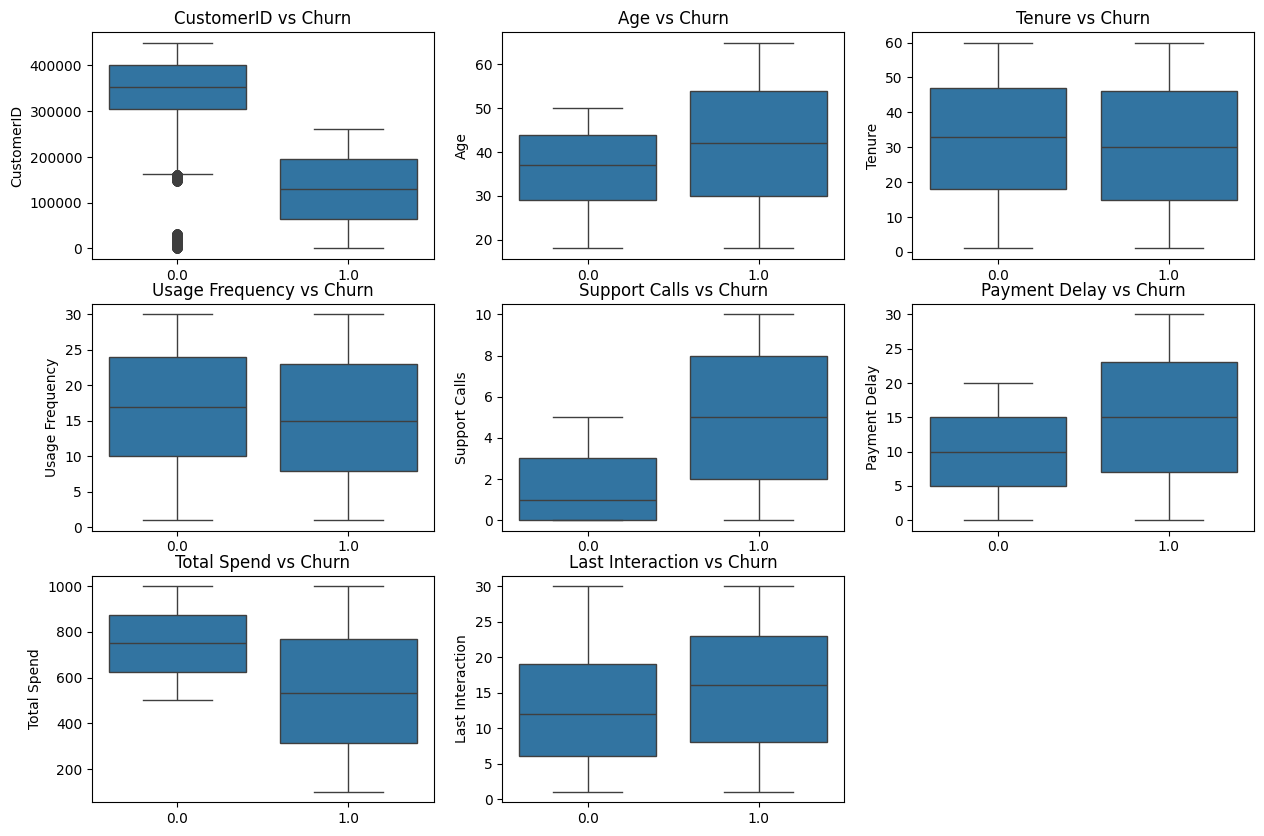

In [30]:
pos = 1
plt.figure(figsize=(15, 10))
for column in numerical_columns:
    plt.subplot(3,3,pos)
    sns.boxplot(x='Churn', y=column, data=df)
    plt.title(f'{column} vs Churn')
    plt.xlabel('')
    pos+=1
plt.show()

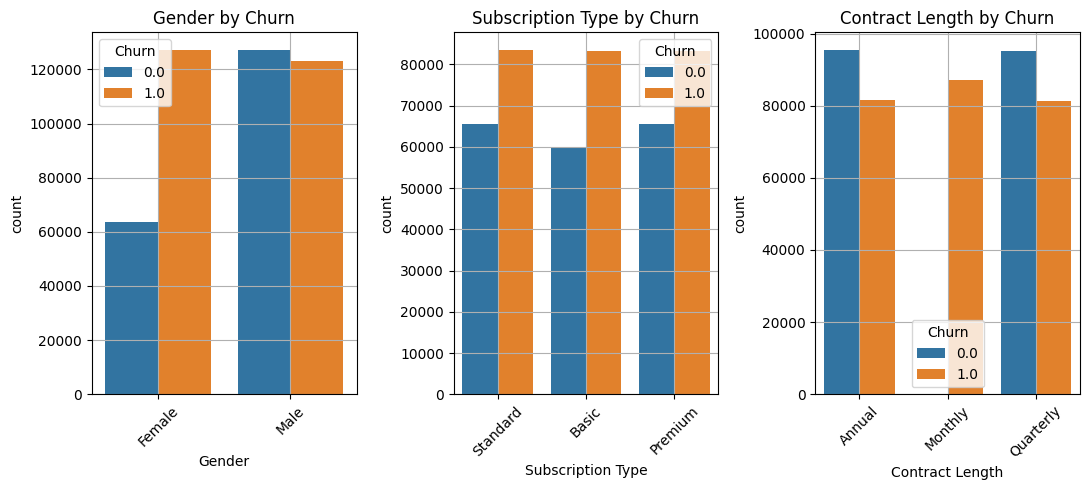

In [31]:
pos = 1
plt.figure(figsize=(11, 5))
for column in categorical_columns:
    plt.subplot(1,3,pos)
    sns.countplot(x=column, hue = 'Churn', data=df)
    plt.title(f'{column} by Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid('on')
    pos+=1
plt.show()

In [32]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in categorical_columns:
  df[column] = le.fit_transform(df[column])

In [33]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.00,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.00,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.00,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.00,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,1,54.0,15.0,1.0,3.0,1,0,716.38,8.0,0.0
440829,449996.0,25.0,0,8.0,13.0,1.0,20.0,1,0,745.38,2.0,0.0
440830,449997.0,26.0,1,35.0,27.0,1.0,5.0,2,2,977.31,9.0,0.0
440831,449998.0,28.0,1,55.0,14.0,2.0,0.0,2,2,602.55,2.0,0.0


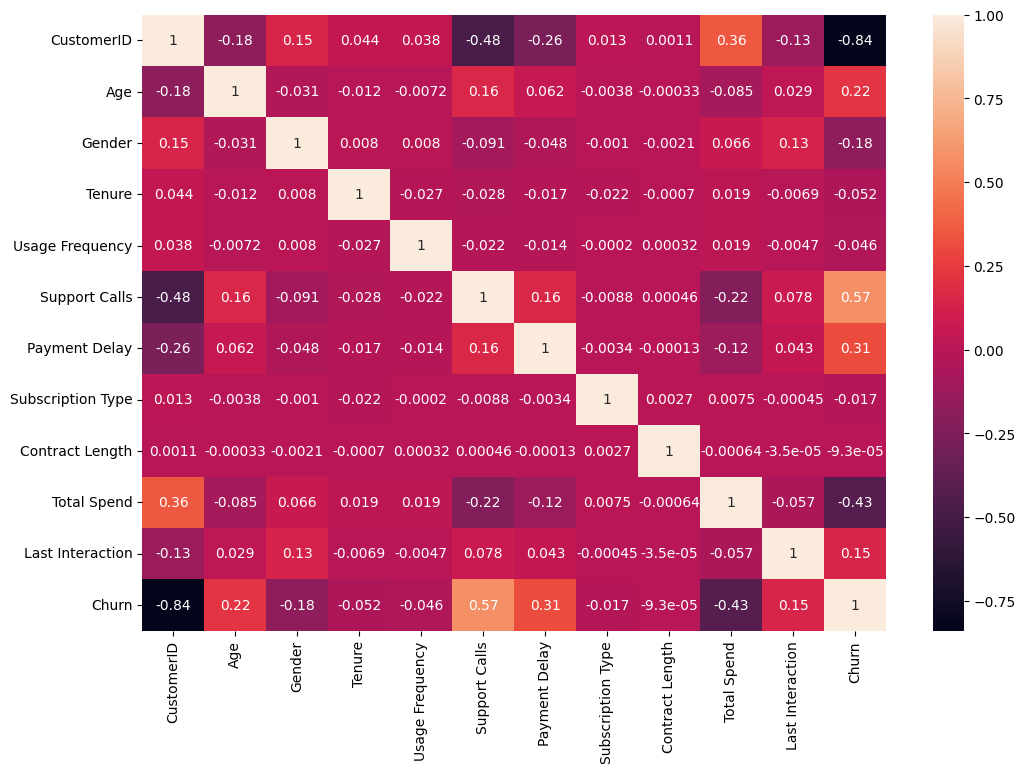

In [34]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [35]:
# Feature and target split
from sklearn.model_selection import train_test_split
X = df.drop(columns = 'Churn')
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [36]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Model training - Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)

In [38]:
# Predictions and evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97     38317
         1.0       0.98      0.98      0.98     49850

    accuracy                           0.98     88167
   macro avg       0.98      0.98      0.98     88167
weighted avg       0.98      0.98      0.98     88167



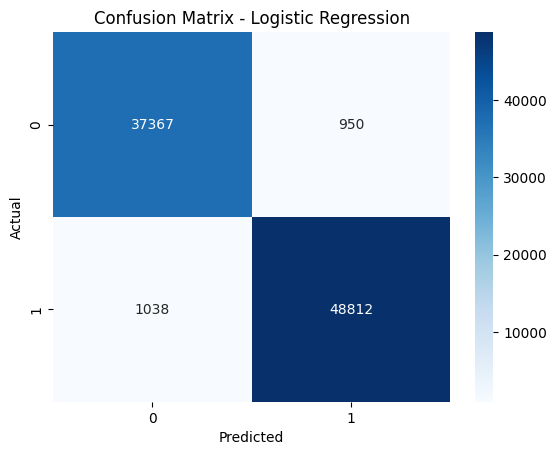

In [39]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
# Model training - Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

In [41]:
# Predictions and evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38317
         1.0       1.00      1.00      1.00     49850

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



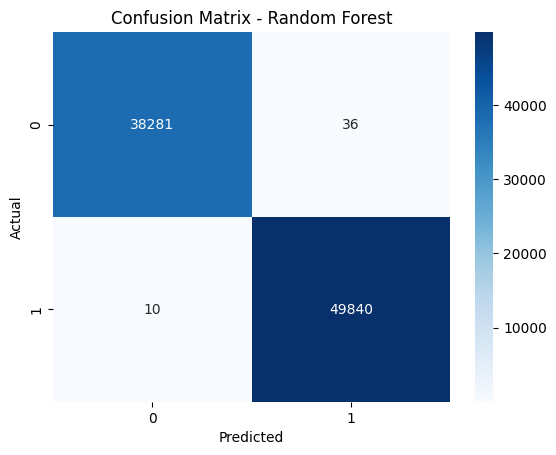

In [42]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC AUC Score: 1.000


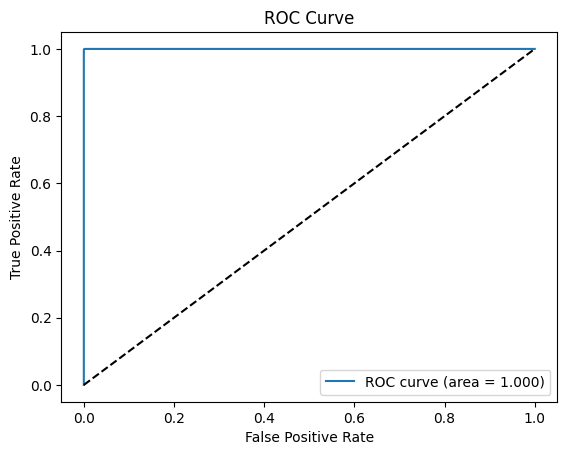

In [43]:
# ROC Curve
y_proba = rf.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()